## Importing specific libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("synthetic_text_data.csv")
X = data['text']
y = data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [10]:
y_pred = model.predict(X_test_vectorized)
y_pred

array(['Politics', 'Technology', 'Technology', 'Politics',
       'Entertainment', 'Entertainment', 'Technology', 'Sports',
       'Technology', 'Politics', 'Politics', 'Technology', 'Sports',
       'Technology', 'Technology', 'Politics', 'Entertainment'],
      dtype='<U13')

In [19]:
accuracy_score(y_test, y_pred)*100

88.23529411764706

In [27]:
conf = confusion_matrix(y_test, y_pred)

In [28]:
class_labels = np.unique(y_test)

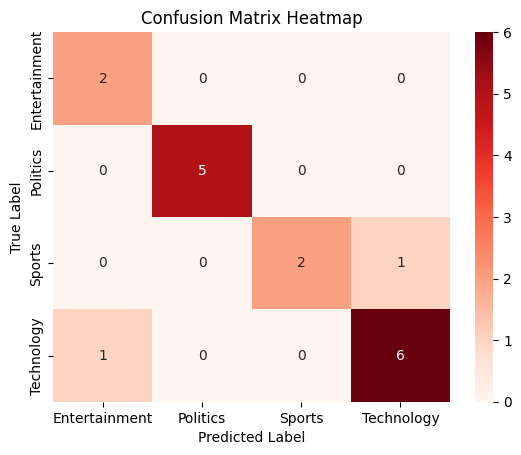

In [43]:
sns.heatmap(conf, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Reds' )
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## User Input testing

In [50]:
user_input = ("The upcoming World Cup qualifying matches are generating massive interest.")
user_input_vectorized = vectorizer.transform([user_input])

predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Sports' category.
